In [164]:
#Import libraries. 
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [165]:
#Check data correctly imported. 
df_train=pd.read_csv('train.csv', encoding='latin1')
df_test=pd.read_csv('test.csv', encoding='latin1')
df_test1=df_test.copy()

df_train_test=[df_train, df_test]

In [166]:
for df in df_train_test:
    df.head()
    df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [167]:
for df in df_train_test:
    df['Pclass'] = '_' + df['Pclass'].astype(str)

In [168]:
for df in df_train_test:
    Titles = []
    for name in df['Name']:
        name=name.split(",")[1] #Return everything under comma (Title. Other Names)
        name=name.split(".")[0] #Return everything before full-stop (Title)
        name=name.strip() #Remove empty spaces
        Titles.append(name) #Append each name into title list
    df['Title'] = Titles
    print(df['Title'].value_counts(normalize=True) * 100)
    print('*-----------------------------*')

Mr              58.024691
Miss            20.426487
Mrs             14.029181
Master           4.489338
Dr               0.785634
Rev              0.673401
Mlle             0.224467
Major            0.224467
Col              0.224467
the Countess     0.112233
Capt             0.112233
Ms               0.112233
Sir              0.112233
Lady             0.112233
Mme              0.112233
Don              0.112233
Jonkheer         0.112233
Name: Title, dtype: float64
*-----------------------------*
Mr        57.416268
Miss      18.660287
Mrs       17.224880
Master     5.023923
Col        0.478469
Rev        0.478469
Ms         0.239234
Dr         0.239234
Dona       0.239234
Name: Title, dtype: float64
*-----------------------------*


In [169]:
for df in df_train_test:
    Other_Titles=((df['Title'].value_counts(normalize=True)*100) < 1) #Titles below 1% return TRUE.
    df['Title']=df['Title'].apply(lambda x: 'Other' if Other_Titles.loc[x] == True else x) 
    df['Title'].value_counts(normalize=True) * 100
    print('*-----------------------------*')
    df.drop(['Name'], axis=1, inplace = True)

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

*-----------------------------*


Mr        57.416268
Miss      18.660287
Mrs       17.224880
Master     5.023923
Other      1.674641
Name: Title, dtype: float64

*-----------------------------*


In [170]:
for df in df_train_test:
    df['FamilySize']=df ['SibSp'] + df['Parch'] + 1
    print(df['FamilySize'].value_counts(normalize=True) * 100)
    print('*-----------------------------*')

1     60.269360
2     18.069585
3     11.447811
4      3.254770
6      2.469136
5      1.683502
7      1.346801
11     0.785634
8      0.673401
Name: FamilySize, dtype: float64
*-----------------------------*
1     60.526316
2     17.703349
3     13.636364
4      3.349282
5      1.674641
7      0.956938
11     0.956938
6      0.717703
8      0.478469
Name: FamilySize, dtype: float64
*-----------------------------*


In [171]:
for df in df_train_test:
    df['Alone'] = df['FamilySize'].map(lambda x: 1 if x == 1 else 0)
    df['Family'] = df['FamilySize'].map(lambda x: 1 if 2 <= x <= 3 else 0)
    df['LargeFamily'] = df['FamilySize'].map(lambda x: 1 if x > 3 else 0)
    FamilyGroups=['Alone','Family', 'LargeFamily']
    df.drop(['FamilySize', 'SibSp', 'Parch'], axis=1, inplace = True)

In [172]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Alone,Family,LargeFamily
0,1,0,_3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,0,1,0
1,2,1,_1,female,38.0,PC 17599,71.2833,C85,C,Mrs,0,1,0
2,3,1,_3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,0
3,4,1,_1,female,35.0,113803,53.1000,C123,S,Mrs,0,1,0
4,5,0,_3,male,35.0,373450,8.0500,NaN,S,Mr,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,_2,male,27.0,211536,13.0000,NaN,S,Other,1,0,0
887,888,1,_1,female,19.0,112053,30.0000,B42,S,Miss,1,0,0
888,889,0,_3,female,NaN,W./C. 6607,23.4500,NaN,S,Miss,0,0,1
889,890,1,_1,male,26.0,111369,30.0000,C148,C,Mr,1,0,0


In [173]:
for df in df_train_test:
    df.drop(['Ticket'], axis=1, inplace = True)

In [174]:
for df in df_train_test:
    print(df.isnull().sum())
    print('*-----------------------------*')

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Cabin          687
Embarked         2
Title            0
Alone            0
Family           0
LargeFamily      0
dtype: int64
*-----------------------------*
PassengerId      0
Pclass           0
Sex              0
Age             86
Fare             1
Cabin          327
Embarked         0
Title            0
Alone            0
Family           0
LargeFamily      0
dtype: int64
*-----------------------------*


In [175]:
for df in df_train_test:
    df['Cabin'].fillna('U', inplace=True)
    df['Cabin'] = df['Cabin'].map(lambda c: c[0])

In [176]:
for df in df_train_test:
    print(df.isna().sum())
    print('*-----------------------------*')

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Cabin            0
Embarked         2
Title            0
Alone            0
Family           0
LargeFamily      0
dtype: int64
*-----------------------------*
PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Cabin           0
Embarked        0
Title           0
Alone           0
Family          0
LargeFamily     0
dtype: int64
*-----------------------------*


In [177]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)
for df in df_train_test:
    print(df.isna().sum())
    print('*-----------------------------*')

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Cabin            0
Embarked         0
Title            0
Alone            0
Family           0
LargeFamily      0
dtype: int64
*-----------------------------*
PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            0
Cabin           0
Embarked        0
Title           0
Alone           0
Family          0
LargeFamily     0
dtype: int64
*-----------------------------*


In [178]:
df_train_encoding=df_train.copy()
df_test_encoding=df_test.copy()
df_train_encoding.drop(['Survived'], axis =1, inplace = True)

df_dummies = pd.get_dummies(df_train_encoding[['Sex', 'Embarked', 'Title', 'Cabin', 'Pclass']])

df_dummies.head()
df_train_encoding = df_train_encoding.join(df_dummies)
df_train_encoding = df_train_encoding.drop(['Sex', 'Embarked', 'Title', 'Cabin', 'Pclass'], axis = 1)

df_test_encoding = df_test_encoding.join(df_dummies)
df_test_encoding = df_test_encoding.drop(['Sex', 'Embarked', 'Title', 'Cabin', 'Pclass'], axis = 1)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass__1,Pclass__2,Pclass__3
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [179]:
imputer=IterativeImputer()
X_train = imputer.fit_transform(df_train_encoding) #Array with imputed data
X_test = imputer.transform(df_test_encoding)

df_Columns = df_train_encoding.columns 
df_train_imputed = pd.DataFrame(X_train, columns = [df_Columns])
df_test_imputed = pd.DataFrame(X_test, columns = [df_Columns])

df_train['Age']=df_train_imputed['Age']
df_test['Age']=df_test_imputed['Age']

for df in df_train_test:
    print(df.isna().sum())
    print('*-----------------------------*')

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
Alone          0
Family         0
LargeFamily    0
dtype: int64
*-----------------------------*
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
Alone          0
Family         0
LargeFamily    0
dtype: int64
*-----------------------------*


In [180]:
df_test['Survived']=np.nan

X_train = df_train.drop(['Survived'], axis=1)
X_test = df_test.drop(['Survived'], axis=1)

y_train = df_train['Survived']
y_test = df_test['Survived']

X_train.head()
X_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,Family,LargeFamily
0,1,_3,male,22.0,7.2500,U,S,Mr,0,1,0
1,2,_1,female,38.0,71.2833,C,C,Mrs,0,1,0
2,3,_3,female,26.0,7.9250,U,S,Miss,1,0,0
3,4,_1,female,35.0,53.1000,C,S,Mrs,0,1,0
4,5,_3,male,35.0,8.0500,U,S,Mr,1,0,0


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,Family,LargeFamily
0,892,_3,male,34.5,7.8292,U,Q,Mr,1,0,0
1,893,_3,female,47.0,7.0000,U,S,Mrs,0,1,0
2,894,_2,male,62.0,9.6875,U,Q,Mr,1,0,0
3,895,_3,male,27.0,8.6625,U,S,Mr,1,0,0
4,896,_3,female,22.0,12.2875,U,S,Mrs,0,1,0


In [181]:
#preprocessing one hot encoding 

In [182]:
categ_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O'] #category columns

ohe = OneHotEncoder(sparse=False)
X_train_encoded=ohe.fit_transform(X_train[categ_cols]) #fit_transform on category columns on train data
X_test_encoded=ohe.transform(X_test[categ_cols]) #transform on category columns on test data 

In [183]:
#delte columns which were one-hot encoded
for col in categ_cols:
    X_train.drop([col], axis=1, inplace=True)
    X_test.drop([col], axis=1, inplace=True)
    
X_train.head()
X_test.head()

,PassengerId,Age,Fare,Alone,Family,LargeFamily
0,1,22.0,7.2500,0,1,0
1,2,38.0,71.2833,0,1,0
2,3,26.0,7.9250,1,0,0
3,4,35.0,53.1000,0,1,0
4,5,35.0,8.0500,1,0,0


,PassengerId,Age,Fare,Alone,Family,LargeFamily
0,892,34.5,7.8292,1,0,0
1,893,47.0,7.0000,0,1,0
2,894,62.0,9.6875,1,0,0
3,895,27.0,8.6625,1,0,0
4,896,22.0,12.2875,0,1,0


In [184]:
categ_cols_encoded = ohe.get_feature_names() #store category column names which have been one-hot encoded
categ_cols_encoded

array(['x0__1', 'x0__2', 'x0__3', 'x1_female', 'x1_male', 'x2_A', 'x2_B',
       'x2_C', 'x2_D', 'x2_E', 'x2_F', 'x2_G', 'x2_T', 'x2_U', 'x3_C',
       'x3_Q', 'x3_S', 'x4_Master', 'x4_Miss', 'x4_Mr', 'x4_Mrs',
       'x4_Other'], dtype=object)

In [185]:
#add columns which have been one-hot encoded
col_count = 0
for col in categ_cols_encoded:
    X_train[col] = X_train_encoded[:, col_count]
    X_test[col] = X_test_encoded[:, col_count]
    col_count = col_count + 1
    
X_train.head()
X_test.head()

,PassengerId,Age,Fare,Alone,Family,LargeFamily,x0__1,x0__2,x0__3,x1_female,...,x2_T,x2_U,x3_C,x3_Q,x3_S,x4_Master,x4_Miss,x4_Mr,x4_Mrs,x4_Other
0,1,22.0,7.2500,0,1,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,38.0,71.2833,0,1,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,26.0,7.9250,1,0,0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,35.0,53.1000,0,1,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,35.0,8.0500,1,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


,PassengerId,Age,Fare,Alone,Family,LargeFamily,x0__1,x0__2,x0__3,x1_female,...,x2_T,x2_U,x3_C,x3_Q,x3_S,x4_Master,x4_Miss,x4_Mr,x4_Mrs,x4_Other
0,892,34.5,7.8292,1,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,893,47.0,7.0000,0,1,0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,894,62.0,9.6875,1,0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,895,27.0,8.6625,1,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,896,22.0,12.2875,0,1,0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [186]:
#scaler

In [187]:
#apply scale transformation
cols = X_train.columns
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) 

In [188]:
##replace old calumn values with standrdized values
col_count = 0
for col in cols:
    X_train[col] = X_train_scaled[:, col_count]
    X_test[col] = X_test_scaled[:, col_count]
    col_count = col_count + 1
    
X_train.head()
X_test.head()

,PassengerId,Age,Fare,Alone,Family,LargeFamily,x0__1,x0__2,x0__3,x1_female,...,x2_T,x2_U,x3_C,x3_Q,x3_S,x4_Master,x4_Miss,x4_Mr,x4_Mrs,x4_Other
0,-1.730108,-0.572650,-0.502445,-1.231645,1.545261,-0.337268,-0.565685,-0.510152,0.902587,-0.737695,...,-0.03352,0.544925,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.850532,-0.403962,-0.176777
1,-1.726220,0.607182,0.786845,-1.231645,1.545261,-0.337268,1.767767,-0.510152,-1.107926,1.355574,...,-0.03352,-1.835115,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.175735,2.475480,-0.176777
2,-1.722332,-0.277692,-0.488854,0.811922,-0.647140,-0.337268,-0.565685,-0.510152,0.902587,1.355574,...,-0.03352,0.544925,-0.482043,-0.307562,0.615838,-0.216803,1.973729,-1.175735,-0.403962,-0.176777
3,-1.718444,0.385964,0.420730,-1.231645,1.545261,-0.337268,1.767767,-0.510152,-1.107926,1.355574,...,-0.03352,-1.835115,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.175735,2.475480,-0.176777
4,-1.714556,0.385964,-0.486337,0.811922,-0.647140,-0.337268,-0.565685,-0.510152,0.902587,-0.737695,...,-0.03352,0.544925,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.850532,-0.403962,-0.176777


,PassengerId,Age,Fare,Alone,Family,LargeFamily,x0__1,x0__2,x0__3,x1_female,...,x2_T,x2_U,x3_C,x3_Q,x3_S,x4_Master,x4_Miss,x4_Mr,x4_Mrs,x4_Other
0,1.733996,0.349094,-0.490783,0.811922,-0.647140,-0.337268,-0.565685,-0.510152,0.902587,-0.737695,...,-0.03352,0.544925,-0.482043,3.251373,-1.623803,-0.216803,-0.506655,0.850532,-0.403962,-0.176777
1,1.737884,1.270838,-0.507479,-1.231645,1.545261,-0.337268,-0.565685,-0.510152,0.902587,1.355574,...,-0.03352,0.544925,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.175735,2.475480,-0.176777
2,1.741772,2.376931,-0.453367,0.811922,-0.647140,-0.337268,-0.565685,1.960202,-1.107926,-0.737695,...,-0.03352,0.544925,-0.482043,3.251373,-1.623803,-0.216803,-0.506655,0.850532,-0.403962,-0.176777
3,1.745659,-0.203953,-0.474005,0.811922,-0.647140,-0.337268,-0.565685,-0.510152,0.902587,-0.737695,...,-0.03352,0.544925,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.850532,-0.403962,-0.176777
4,1.749547,-0.572650,-0.401017,-1.231645,1.545261,-0.337268,-0.565685,-0.510152,0.902587,1.355574,...,-0.03352,0.544925,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.175735,2.475480,-0.176777


In [189]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
xgbClassifier = xgb.XGBClassifier()
xgbClassifier_model = xgbClassifier.fit(X_train, y_train)

In [190]:
print("Random Forest Cross-Val Score: " + str(cross_val_score(rf_model, X_train, y_train, cv=10, scoring = "roc_auc").mean()))
print("Logistic Regression Cross-Val Score: " + str(cross_val_score(lr_model, X_train, y_train, cv=10, scoring="roc_auc").mean()))
print("XGB Classification Cross-Val Score: " + str(cross_val_score(xgbClassifier_model, X_train, y_train, cv=10, scoring="roc_auc").mean()))

Random Forest Cross-Val Score: 0.8597612539965482
Logistic Regression Cross-Val Score: 0.8662518178988767
XGB Classification Cross-Val Score: 0.845634750870045


In [191]:
#feature selection? 
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

<AxesSubplot:ylabel='feature'>

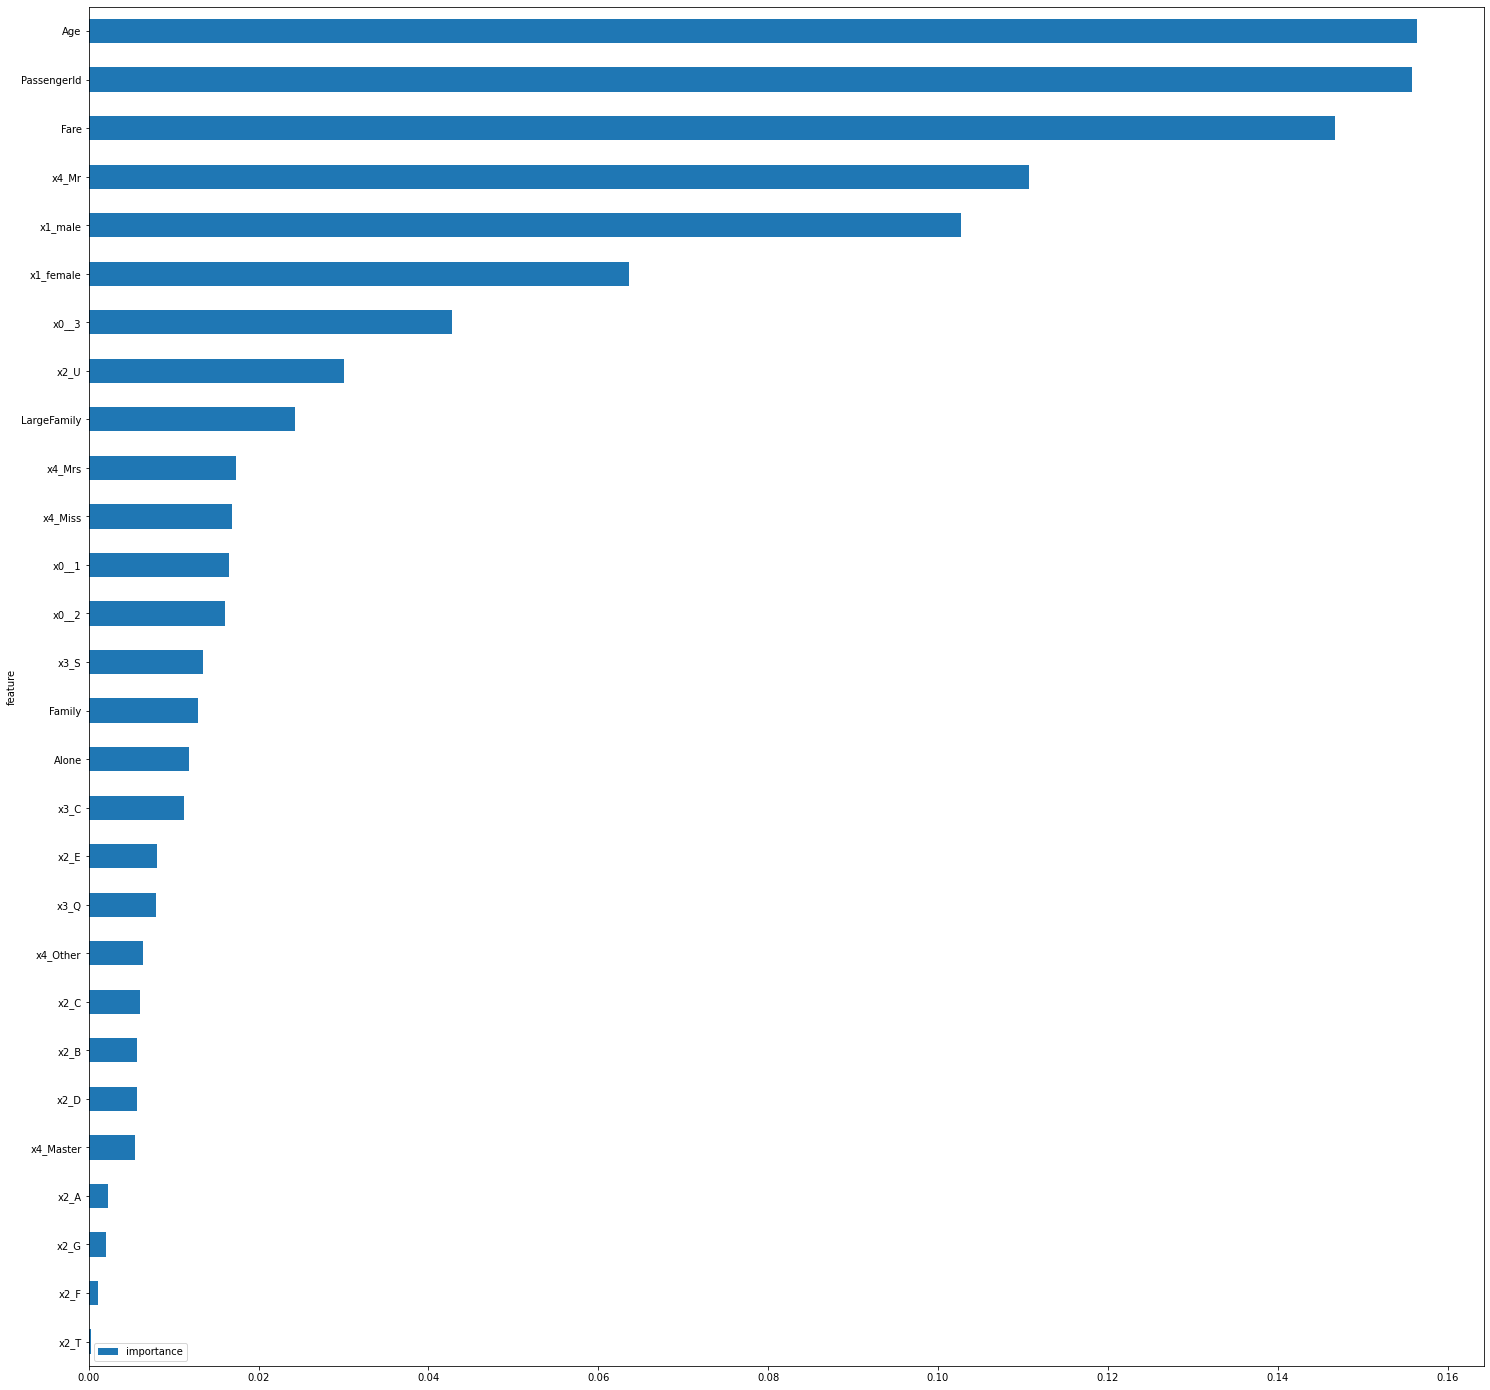

In [192]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [193]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
X_train = train_reduced
print(train_reduced.shape)
# (891L, 14L)

test_reduced = model.transform(X_test)
X_test = test_reduced 
print(test_reduced.shape)

(891, 7)
(418, 7)


In [195]:
%%capture
#rf
params_rf = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'bootstrap': [True, False]
}
clf_rf = RandomizedSearchCV(rf_model, param_distributions=params_rf, n_iter=5, scoring='roc_auc', cv=5, verbose=3)
clf_rf.fit(X_train,y_train)
#lr 
params_lr = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}
clf_lr = RandomizedSearchCV(lr_model, param_distributions=params_lr, n_iter=5, scoring='roc_auc', cv=5, verbose=3)
clf_lr.fit(X_train,y_train)

#xgboost regression 
params_xgb = {
    'learning_rate' : [.05,.1,.15, .2, .25, .3],
    'max_depth' : range(3, 10, 1),
    'min_child_weight' : [1, 3, 5],
    'gamma' : [0, 1, 2, 3],
    'colsample_bytree' : [0.5, 0.7, 0.9]
}
clf_xgboost = RandomizedSearchCV(xgbClassifier_model, param_distributions=params_xgb, n_iter=5, scoring='roc_auc', cv=5, verbose=3)
clf_xgboost.fit(X_train,y_train)

In [196]:
clf_rf.best_params_
clf_lr.best_params_
clf_xgboost.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 0.1}

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 3,
 'colsample_bytree': 0.9}

In [197]:
rf_final_model=clf_rf.best_estimator_
lr_final_model=clf_lr.best_estimator_
xgb_final_model=clf_xgboost.best_estimator_
print("Random Forest Cross-Val Score: " + str(cross_val_score(rf_final_model, X_train, y_train, cv=10, scoring = "roc_auc").mean()))
print("Logistic Regression Cross-Val Score: " + str(cross_val_score(lr_final_model, X_train, y_train, cv=10, scoring="roc_auc").mean()))
print("XGB Classification Cross-Val Score: " + str(cross_val_score(xgb_final_model, X_train, y_train, cv=10, scoring="roc_auc").mean()))

Random Forest Cross-Val Score: 0.8652531477237361
Logistic Regression Cross-Val Score: 0.8507070990012167
XGB Classification Cross-Val Score: 0.8717236227824461


In [198]:
votingC = VotingClassifier(estimators=[('rf', rf_final_model), ('lr', lr_final_model),('xgb', xgb_final_model)], 
                           voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [199]:
predictions = votingC.predict(X_test)
output = pd.DataFrame({'PassengerId': df_test1.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

In [200]:
a=pd.read_csv('submission.csv', encoding='latin1')
a.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [201]:
#Next-step: rate it on other metrics. 
#discussion points... 
#hyperparameter training (grid search, random, bayean optimization))
#one hot vs ordinal vs target vs frequency 
#do you standardize on freq encoded data? 